<div align='center'><font size="5" color='#353B47'>MOVIE RATING PREDICTION</font></div>
<br>
<hr>

# Case :- Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.



The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

• Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.



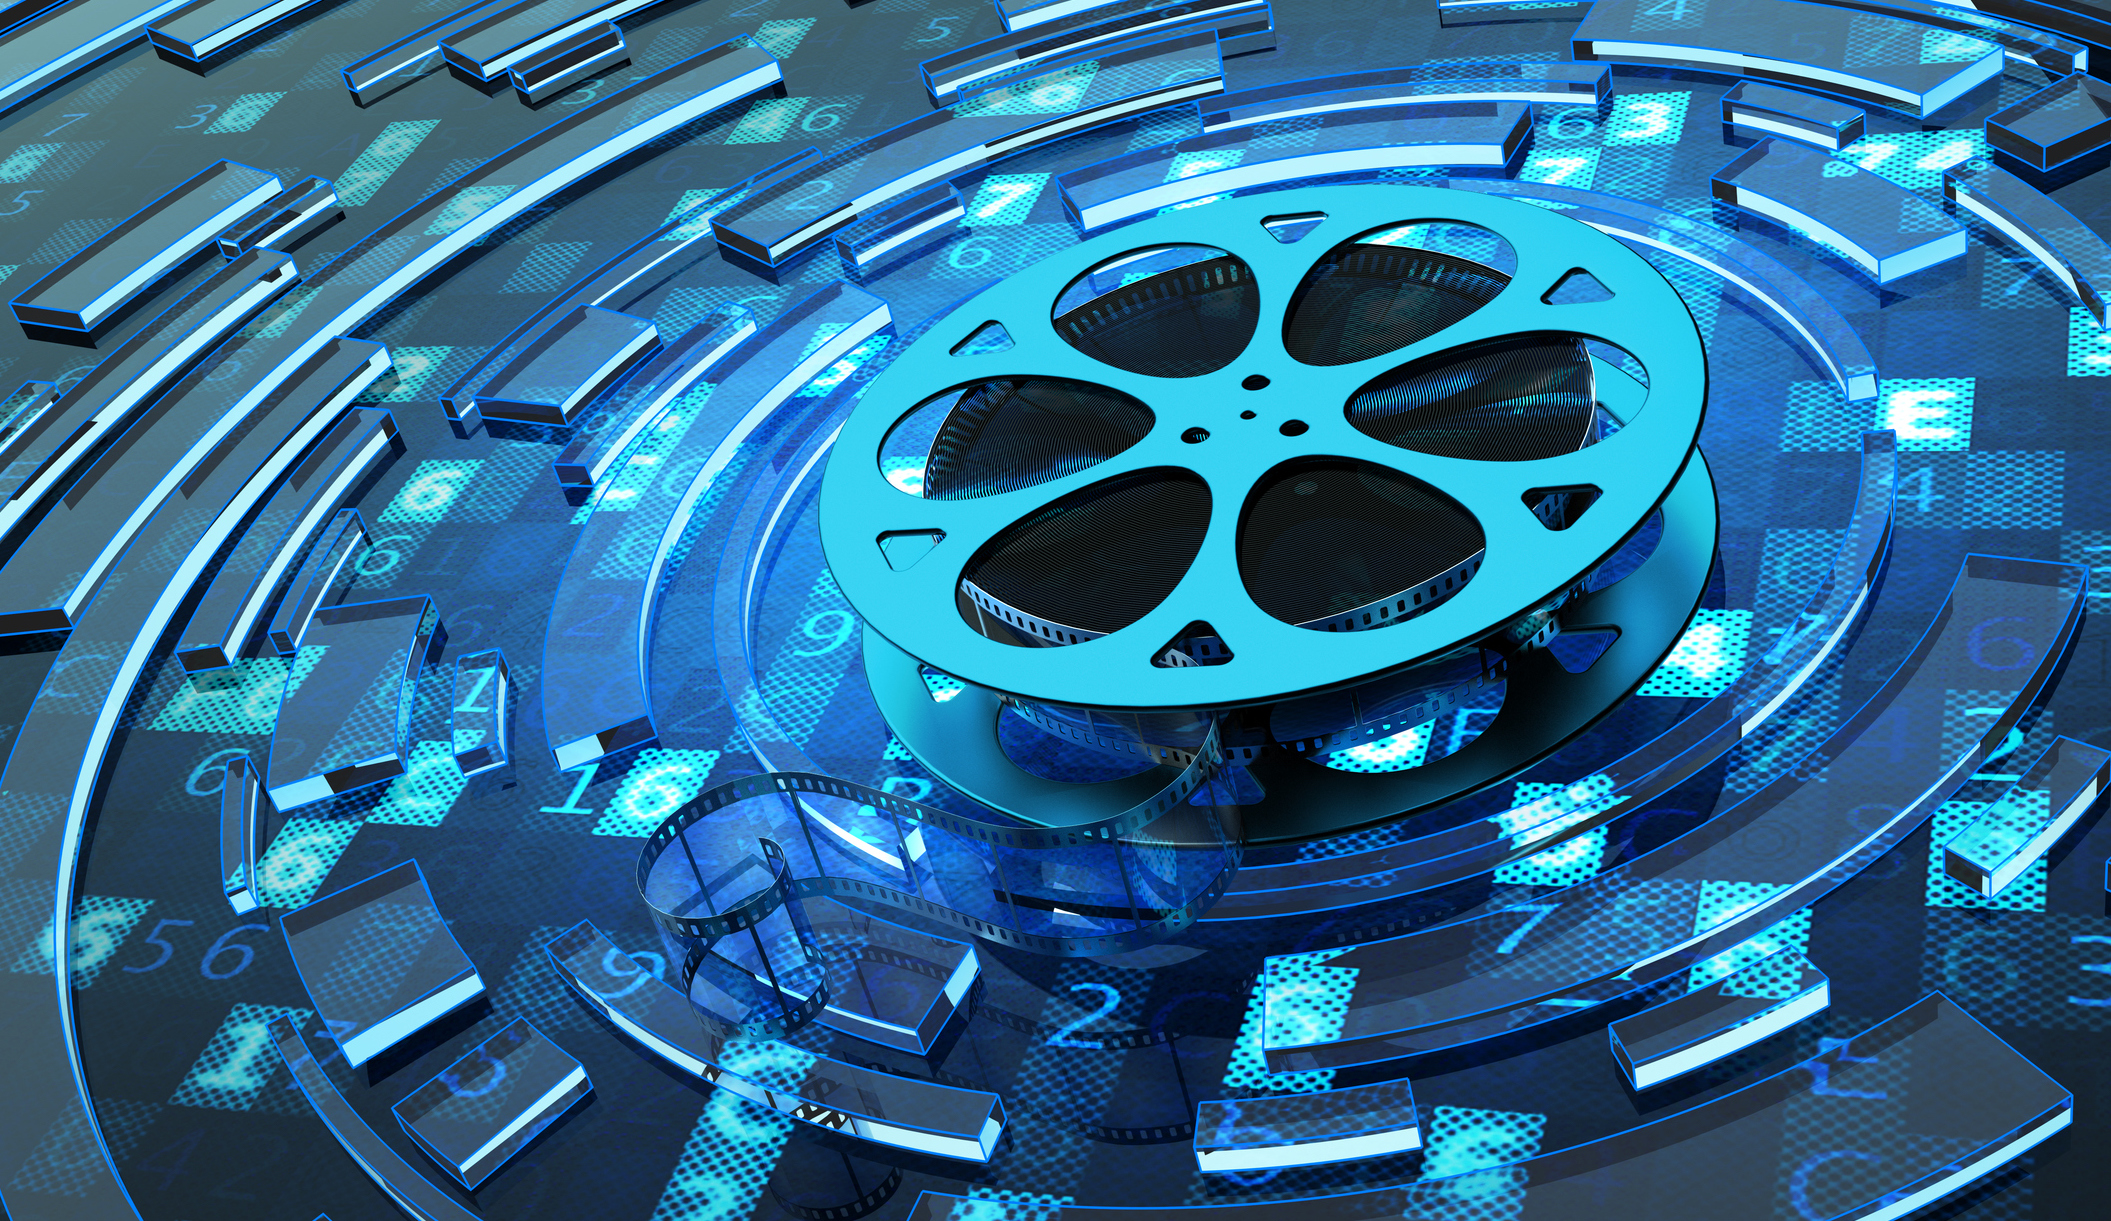

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Movies.csv',encoding='latin-1')
data

Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           Actor 1             Actor 2  \
0         NaN   NaN       J.S. Randhawa          Manmauji              Birbal   
1         7.0     8       Gaurav Bakshi      Rasika Dugal      Vivek Ghamande   
2         NaN   NaN  Soumyajit Majumdar      Sayani Gupta   Plabita Borthakur   
3         4.4    35          Ovais Khan           Prateik          Ishita Raj   
4         NaN   NaN        Amol Palekar      Rajat Kapoor  Rituparna Sengupta   
...       ...   ...                 ...               ...                 ...   
15504     4.6    11       Mahendra Shah  Naseeruddin Shah       Sumeet Saigal   
15505     4.5   655          Kuku Kohli      Akshay Kumar      Twinkle Khanna   
15506     NaN   NaN          Kiran Thej   Sangeeta Tiwari                 NaN   
15507     NaN   NaN                 NaN               NaN                 NaN   
15508     6.2    20        K.C. Bokadia        Dharmendra          Jaya Prada   

               Actor 3  
0      Rajendra Bhatia  
1        Arvind Jangid  
2           Roy Angana  
3      Siddhant Kapoor  
4          Antara Mali  
...                ...  
15504    Suparna Anand  
15505      Aruna Irani  
15506              NaN  
15507              NaN  
15508      Arjun Sarja  

[15509 rows x 10 columns]

### Domain Anlaysis

### Basic Checks 

In [3]:
data.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [4]:
data.tail()

Name    Year Duration          Genre  Rating Votes  \
15504  Zulm Ko Jala Doonga  (1988)      NaN         Action     4.6    11   
15505                Zulmi  (1999)  129 min  Action, Drama     4.5   655   
15506            Zulmi Raj  (2005)      NaN         Action     NaN   NaN   
15507        Zulmi Shikari  (1988)      NaN         Action     NaN   NaN   
15508         Zulm-O-Sitam  (1998)  130 min  Action, Drama     6.2    20   

            Director           Actor 1         Actor 2        Actor 3  
15504  Mahendra Shah  Naseeruddin Shah   Sumeet Saigal  Suparna Anand  
15505     Kuku Kohli      Akshay Kumar  Twinkle Khanna    Aruna Irani  
15506     Kiran Thej   Sangeeta Tiwari             NaN            NaN  
15507            NaN               NaN             NaN            NaN  
15508   K.C. Bokadia        Dharmendra      Jaya Prada    Arjun Sarja

In [5]:
data.describe()

Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

In [6]:
data.describe(include='O')

Name    Year Duration  Genre Votes      Director      Actor 1  \
count    15509   14981     7240  13632  7920         14984        13892   
unique   13838     102      182    485  2034          5938         4718   
top     Anjaam  (2019)  120 min  Drama     8  Jayant Desai  Ashok Kumar   
freq         7     410      240   2780   227            58          158   

       Actor 2 Actor 3  
count    13125   12365  
unique    4891    4820  
top      Rekha    Pran  
freq        83      91

### insights :

#### The data consist of missing values.

#### The Top duration is 120 min 

#### 13838 unique values


In [7]:
data.shape

(15509, 10)

In [8]:
data.size

155090

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


#### The data consists of 15509 rows and 10 columns in which 9 are object and the 1 left is float.

### Exploratory data analysis

##### univeriate Analysis

In [22]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Insights from the data

##### 13838 distinct values. 

##### Year has 102 distict values wirh 3% (528) of missing values.

##### Duration has 182 unique values with 53% present of missing values.

##### Genre has 485 unquie values with 12% null values. 20% of the movies have genre as Drama which isnthe highest.

##### Rating is the output attribute with 49% of missing values. It has a negatively skewed distribution. Rating ranges from 1 to 10

##### Votes has 525 missing values. 3% of the movies has got 8 votes which is the highest.

#####  Director has 3% of missing values. From 14,984 values 58 movies are directed by jayant desai.

##### Actor 1 has 10% mssing values. Ashok Kumar is the most frequent actor 1.

##### Actor 2 has 15% mssing values. Rekha is the most frequent actor 2.

##### Actor 3 has 20% mssing values. Pran is the most frequent actor 3.



In [10]:
data.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

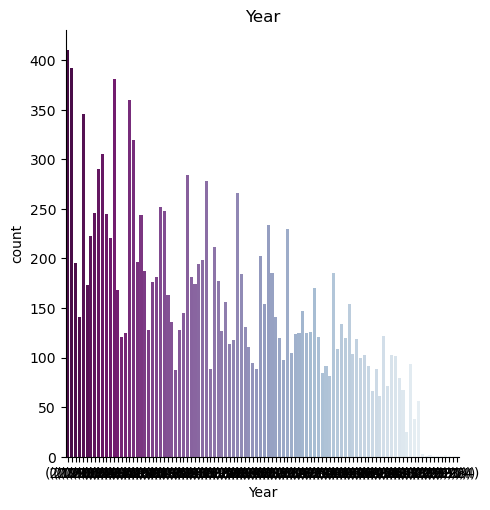

In [11]:
sns.catplot(x ='Year',data = data,kind = 'count',palette = 'BuPu_r')
plt.title("Year")
plt.show()

#### Dropping the Null values from rating as it is the output 

In [6]:
data.dropna(subset=['Rating'],inplace=True)

#### Dropping the Null values from 'Actor 1','Actor 2','Actor 3','Director','Genre'

In [7]:
data.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)


#### Imputing duration values I will change years from (2019) to 2019 and convert votes to integer by removing comma in higher values for votes and duration is in min so to convert it into integer we will have to remove 'min' string


In [8]:
data['Votes']= data['Votes'].str.replace(',','').astype(int)
data['Year']= data['Year'].str.strip('()').astype(int)
data['Duration']=data['Duration'].str.strip(' min')


#### Imputing the Null values present in Duration with random number from 90 to 181

C:\Users\RAHULKUMAR.M\AppData\Local\Temp\ipykernel_11636\1401484592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Duration'][d1] = random_num


<AxesSubplot:xlabel='Duration', ylabel='Count'>

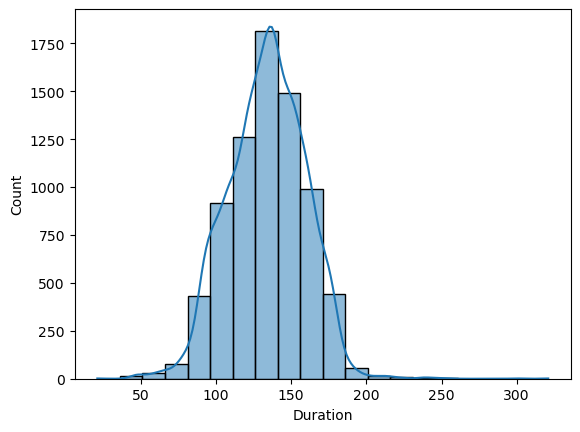

In [9]:
d1 = data['Duration'].isnull()
random_num = np.random.randint(90, 181, size=d1.sum())  # Generate random numbers
data['Duration'][d1] = random_num
duration = data.loc[~data['Duration'].isnull(), 'Duration'].astype(int)
data['Duration'] = data['Duration'].astype(int)    
sns.histplot(data=data,x=data['Duration'].fillna(duration.mean()).astype(int),bins=20,kde=True)

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   int32  
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 819.0+ KB


In [11]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
data.shape

(7558, 10)

In [13]:
## Checking duplicate in the data 
data.duplicated().sum()
#there are no duplicates in the dataset

0

In [14]:
#Year
data.Year.value_counts()

2019    238
2017    223
2018    214
2015    188
2016    184
       ... 
1939      4
1931      3
1932      2
1934      2
1917      1
Name: Year, Length: 92, dtype: int64

In [15]:
data.Duration.value_counts()

120    183
135    172
150    160
130    157
140    152
      ... 
201      1
247      1
211      1
321      1
250      1
Name: Duration, Length: 174, dtype: int64

In [16]:
data.Genre.value_counts()

Drama                              1137
Drama, Romance                      443
Action, Crime, Drama                417
Action                              391
Drama, Family                       291
                                   ... 
Family, Drama, Thriller               1
Action, Musical, War                  1
Action, Fantasy, Horror               1
Horror, Crime, Thriller               1
Documentary, Biography, Musical       1
Name: Genre, Length: 416, dtype: int64

#### **So there are more movies with genre of Drama followed by Action and Romance**

#### Checking top 20 movies

In [17]:
top_20_movies = data.loc[data['Rating'].sort_values(ascending=False)[:20].index]
top_20_movies


Name  Year  Duration  \
8339                                   Love Qubool Hai  2020        94   
5410                                        Half Songs  2021        79   
2563                                             Breed  2020        91   
14222                              The Reluctant Crime  2020       113   
5077                                      Gho Gho Rani  2019       105   
6852                                              June  2021        93   
12673                               Secrets of Sinauli  2021        56   
5125                                       God of gods  2019        90   
8344                                      Love Sorries  2021       101   
1314                                      Ashok Vatika  2018        97   
13231                                       Sindhustan  2019        64   
11843                                          Refl3ct  2021        65   
9105                                             Meher  2020       118   
1729                                          Baikunth  2021        72   
14071  The Flip Side: A Truth That Could Not Reach You  2015        48   
6025                                       I'm in Love  2007       140   
10217                                        Nirvana13  2011        95   
4278                                               Dus  1997       140   
6952                                            Kaadan  2021       170   
13384                                  Soorarai Pottru  2020       153   

                              Genre  Rating  Votes         Director  \
8339                 Drama, Romance    10.0      5  Saif Ali Sayeed   
5410                 Music, Romance     9.7      7      Sriram Raja   
2563                          Drama     9.6     48      Bobby Kumar   
14222                         Drama     9.4     16    Arvind Pratap   
5077               History, Romance     9.4     47     Munni Pankaj   
6852                          Drama     9.4     18   Suhrud Godbole   
12673          Documentary, History     9.3   1373   Raghav Jairath   
5125                    Documentary     9.3     46     Venkatesh Bk   
8344         Comedy, Drama, Romance     9.3     79     Gautam Joshi   
1314                          Drama     9.3      7    Rahul Mallick   
13231  Documentary, Family, History     9.3     36   Sapna Bhavnani   
11843                        Sci-Fi     9.3    467     Nikhil Mahar   
9105                          Drama     9.3     27   Rajat Bhardwaj   
1729                         Family     9.3     29     Vishwa Bhanu   
14071                   Documentary     9.2     97      Utpal Kalal   
6025                         Action     9.2     36        Tom Alter   
10217                         Drama     9.1     99      Jitin Rawat   
4278                         Action     9.1     44      Mukul Anand   
6952         Action, Drama, Fantasy     9.1   2219    Prabu Solomon   
13384                         Drama     9.1  83029    Sudha Kongara   

                 Actor 1             Actor 2              Actor 3  
8339           Ahaan Jha      Mahesh Narayan  Rajasree Rajakumari  
5410        Raj Banerjee     Emon Chatterjee    Purshottam Mulani  
2563         Bobby Kumar              Ashfaq       Fasih Choudhry  
14222    Dharmendra Ahir      Awanish Kotnal         Rakhi Mansha  
5077   Nishi Neha Mishra        Pankaj Kamal          Akash Kumar  
6852      Vaibhav Khisti      Nilesh Divekar       Jitendra Joshi  
12673     Manoj Bajpayee          R.S. Bhist           K.N. Dixit  
5125   Tejaswini Manogna       Triyug Mantri      Raj Singh Verma  
8344    Prashant Chaubey     Puneet Chouksey        Amitabh Gupta  
1314          Kunj Anand      Sanjay Bishnoi         Paras Zutshi  
13231       Leila Advani         Laj Badlani          Chaho Bhara  
11843        Vijay Mahar         Vijay Mahar         Nikhil Mahar  
9105               Amrit      Dimple Chauhan            Sapna Das  
1729        Vishwa Bhanu       Sangam Shukla       

### above the 20 movies with top rating

### Outliers

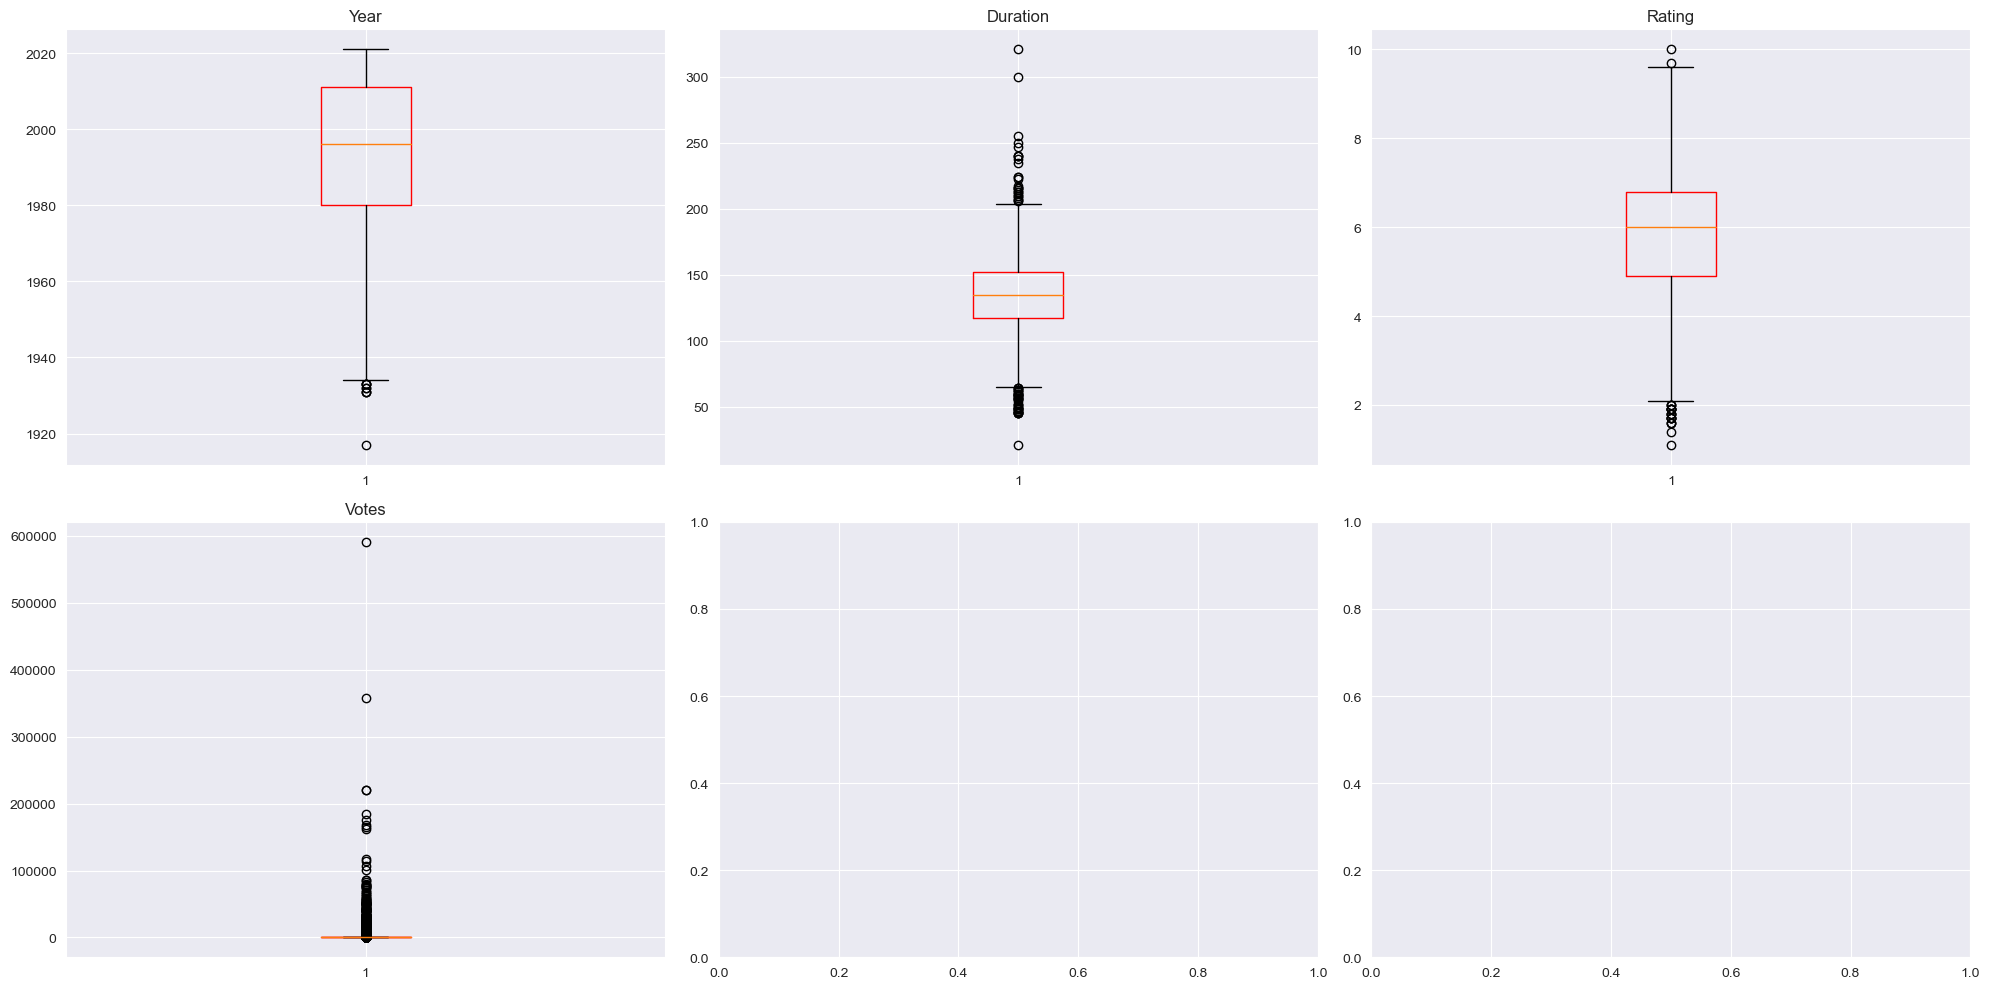

In [20]:
numeric_cols = data.select_dtypes(include=[float, int]).columns
num_plots = len(numeric_cols)
num_cols = 3  # number of columns per row
num_rows = int(np.ceil(num_plots/num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

for i, col_name in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].boxplot(data[col_name], boxprops=dict(color='red'))
    axes[row, col].set_title(col_name)


plt.tight_layout()  
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


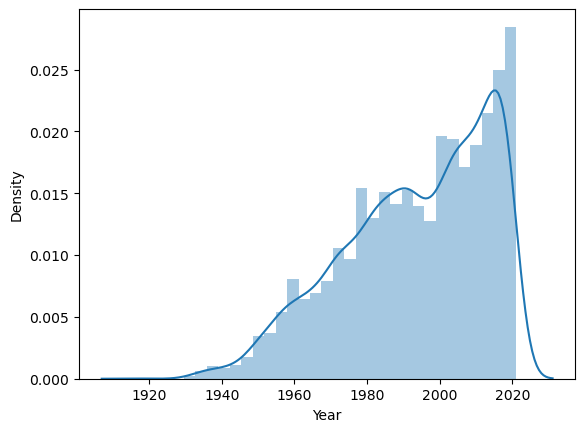

In [18]:
#Year
sns.distplot(data.Year)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


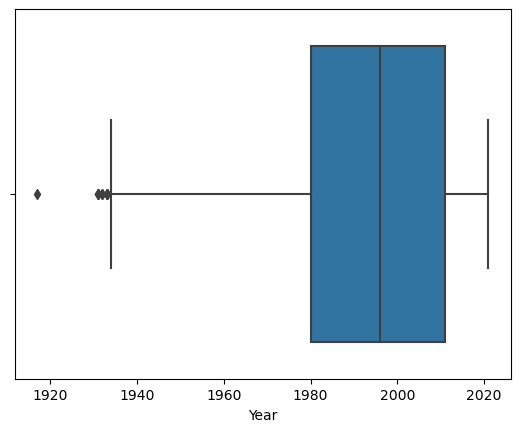

In [19]:
sns.boxplot(data.Year)
plt.show()


In [20]:
#calculating the IQR range
from scipy import stats

IQR=stats.iqr(data.Year,interpolation='midpoint')
IQR

31.0

In [21]:
Q1=data.Year.quantile(0.25)
Q3=data.Year.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [22]:
data.loc[data['Year']<min_limit]

Name  Year  Duration                      Genre  \
550                 Abe Hayat  1933       123                      Drama   
851                Alif Laila  1933       124                    Fantasy   
2142           Bhakta Prahlad  1932       150                      Drama   
2265          Bhool Bhulaiyan  1933       147                     Comedy   
4171                 Draupadi  1931       124                      Drama   
4658                     Fate  1933        68             Drama, Romance   
6073               Indrasabha  1932       211           Musical, Romance   
7203                  Kalidas  1931       101    Drama, History, Musical   
8146              Lanka Dahan  1917       149  Adventure, Drama, Fantasy   
14161  The Light of the World  1931       124             Drama, Fantasy   

       Rating  Votes                 Director           Actor 1  \
550       2.8     10            Krishna Gopal         Ali Athar   
851       7.2     37            Balwant Bhatt       Shanti Dave   
2142      5.5      6         Kanjibhai Rathod            Neelam   
2265      6.0      6             Jayant Desai             Ghori   
4171      5.3      6   Bhagwati Prasad Mishra            Khalil   
4658      6.2     12                John Hunt       Devika Rani   
6073      6.0     12               J.J. Madan            Nissar   
7203      6.2     12               H.M. Reddy  T.P. Rajalakshmi   
8146      6.7     22  Dhundiraj Govind Phalke      Anna Salunke   
14161     6.2    112           Ardeshir Irani     Master Vithal   

                Actor 2              Actor 3  
550              Bachan                Nazir  
851        Bashir Qawal                Zohra  
2142          Hydershah         Kumar Mukund  
2265              Dixit     Kamlabai Gokhale  
4171           Ermeline                Jillo  
4658       Himanshu Rai       Abraham Sofaer  
6073    Jehanara Kajjan  Abdul Rehman Kabuli  
7203    P.G. Venkatesan          L.V. Prasad  
8146   Ganpat G. Shinde           D.D. Dabke  
14161           Zubeida                Jillo

In [23]:
data.loc[data['Year']<min_limit,'Year']=np.median(data.Year)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


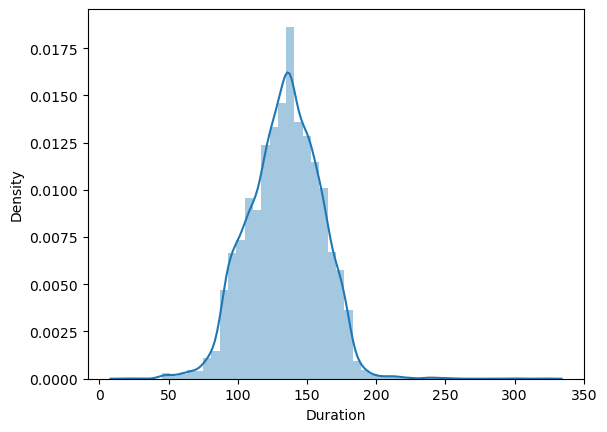

In [24]:
#Duration
sns.distplot(data.Duration)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


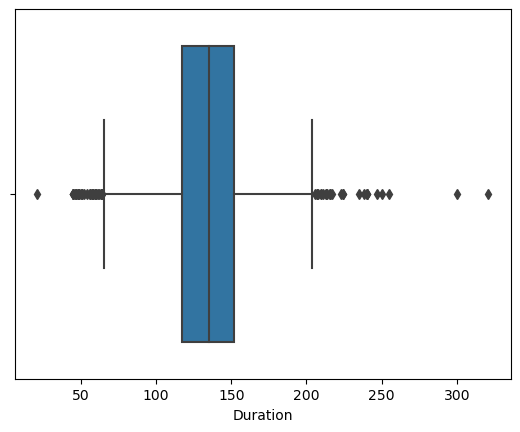

In [25]:
sns.boxplot(data.Duration)
plt.show()


In [26]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.Duration,interpolation='midpoint')
IQR

35.0

In [27]:
Q1=data.Duration.quantile(0.25)
Q3=data.Duration.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [28]:
data.loc[data['Duration']>max_limit]

Name  Year  Duration  \
490                       Aasma: The Sky Is the Limit  2009       240   
1345                                          Athidhi  2007       300   
2853                                          Chandra  1948       207   
3903                             Dil... Akhir Dil Hai  1982       216   
4902                               Gangs of Wasseypur  2012       321   
5825                          Hum Aapke Hain Koun...!  1994       206   
6073                                       Indrasabha  1996       211   
6553                                           Janwar  1965       247   
6772                                     Jodhaa Akbar  2008       213   
7045                      Kabhi Khushi Kabhie Gham...  2001       210   
7522                                       Khatarnaak  1990       223   
7610                                     Khoon Pasina  1977       210   
8035                Lagaan: Once Upon a Time in India  2001       224   
8251                                      LOC: Kargil  2003       255   
9179                                  Mera Naam Joker  1970       224   
9460                                      Mohabbatein  2000       216   
9982                                        Narasimha  1991       214   
10157  Netaji Subhas Chandra Bose: The Forgotten Hero  2005       208   
11844                                         Refugee  2000       207   
12263                                   Salaam-E-Ishq  2007       216   
12365                                          Sangam  1964       238   
12594                                        Saudagar  1991       213   
13713                   Taj Mahal: A Monument of Love  2003       235   
13784                              Taqdeer Ka Tamasha  1990       217   
14809                                           Veera  1994       240   
14854              Vidhyaarthi: The Power of Students  2006       250   
14938                                     Vivekananda  1998       240   

                           Genre  Rating   Votes                  Director  \
490                        Drama     3.8      46  Rohit Krishnakant Nayyar   
1345                      Action     5.6    1807            Surender Reddy   
2853                       Drama     6.9      39                S.S. Vasan   
3903                       Drama     5.5      15           Esmayeel Shroff   
4902       Action, Comedy, Crime     8.2   86355            Anurag Kashyap   
5825      Comedy, Drama, Musical     7.5   19669        Sooraj R. Barjatya   
6073            Musical, Romance     6.0      12                J.J. Madan   
6553            Musical, Romance     7.0     168              Bhappi Sonie   
6772      Action, Drama, History     7.6   30717        Ashutosh Gowariker   
7045     Drama, Musical, Romance     7.4   46172               Karan Johar   
7522        Action, Crime, Drama     5.2      82         Bharat Rangachary   
7610               Action, Drama     6.2     357              Rakesh Kumar   
8035       Drama, Musical, Sport     8.1  107234        Ashutosh Gowariker   
8251         Drama, History, War     5.2    2601                J.P. Dutta   
9179               Comedy, Drama     8.0    4684                Raj Kapoor   
9460     Musical, Drama, Romance     7.1   27990             Aditya Chopra   
9982               Action, Drama     5.5     424                N. Chandra   
10157  Biography, Drama, History     7.6    1095             Shyam Benegal   
11844    Drama, Musical, Romance     5.4    1881                J.P. Dutta   
12263     Comedy, Drama, Musical     5.1    5260            Nikkhil Advani   
12365    Drama, Musical, Romance     7.5    1611                Raj Kapoor   
12594     Action, Drama, Romance     6.8    1279              Subhash Ghai   
13713    Drama, History, Romance     6.7      51              Robin Khosla   
13784       Action, Crime, Drama     4.2      40             Anand Gaekwad   
14809            Comedy, Romance     6.6     571      

In [29]:
data.loc[data['Duration']<min_limit]

Name  Year  Duration  \
280                                Aaj Ka Andha Kanoon  2003        46   
789                                    Akela the Alone  2014        58   
1513                              Baarish Aur Chowmein  2018        48   
2057                                  Beyond Bollywood  2013        64   
2723                                       Chai Coffee  2019        49   
2757                    Chala Mussaddi - Office Office  2011        60   
3817                                              Didi  1989        59   
4300                                           Dvandva  2009        51   
4504                 Ek Sainik - The Tale of a warrior  2020        45   
4656                                      Fast Forward  2009        57   
5200                                             GRADE  2017        64   
5756                                      Home Stories  2020        47   
6062                                  India's Daughter  2015        63   
6695                                          Jhakaas!  2018        56   
7536                                         Khazanchi  1958        51   
8046                                            Lagori  2017        48   
8082                                          Lajwanti  2014        63   
8709      Main Tumhare Bachche ki Maa Banne Waali Hoon  2017        45   
10363                               Operation Parindey  2020        60   
10373                                     Out of a Jam  2015        59   
10504                                        Panchaali  2018        49   
10974                                       Pratibimbo  2020        21   
11935                                   Road to Ladakh  2003        50   
12002                                           Roshni  2018        45   
12142                                          Sabrang  2017        54   
12657                             Searching for Sheela  2021        58   
12658                                 Seasons Greeting  2019        47   
12673                               Secrets of Sinauli  2021        56   
12970                                     Shehri Gabru  2020        62   
13174                                     Shubh Raatri  2020        52   
13217                                           Silvat  2018        45   
13231                                       Sindhustan  2019        64   
13579                                 Sunn Raha Hai Na  2017        56   
13584                                 Sunset Bollywood  2005        60   
14071  The Flip Side: A Truth That Could Not Reach You  2015        48   
14664                                             Used  2019        57   
14822                                         Veergati  2019        61   

                               Genre  Rating  Votes                Director  \
280                           Action     3.1     15      Amit Chandra Sahay   
789                         Thriller     5.5     10                   Abrar   
1513                           Drama     6.1    271        Tigmanshu Dhulia   
2057   Documentary, Biography, Drama     6.1     58                Adam Dow   
2723                  Drama, Romance     7.9     11          Ayush Upadhyay   
2757                   Comedy, Drama     6.1    346             Rajiv Mehra   
3817                   Drama, Family     7.6      7             Tapan Sinha   
4300           Crime, Drama, Mystery     6.1     15       Chhatrapal Ninawe   
4504                   Action, Drama     8.2     17         Pratyush Sharma   
4656          Action, Drama, Musical     5.6     46        Zaigham Ali Syed   
5200                           Drama     6.1     27           Anup Samaddar   
5756                          Comedy     6.6     18            Tanvi Gandhi   
6062   Documentary, Biography, Crime     8.2   1998            Leslee Udwin   
6695                   Comedy, Drama     6.1     11           Anirudh Baboo   
7536                         Romance     5.8     12 

In [30]:
len(data.loc[data['Duration']>max_limit])


27

In [31]:
len(data.loc[data['Duration']<min_limit])

37

In [32]:
data.shape

(7558, 10)

In [33]:
27/7558*100
#We have to handle outliers  as they are less than 5% 

0.3572373643821117

In [34]:
37/7558*100
#We have to handle outliers  as they are less than 5% 

0.4895474993384493

In [35]:
data.loc[data['Duration']>max_limit,'Duration']=np.median(data.Duration)

In [36]:
data.loc[data['Duration']<min_limit,'Duration']=np.median(data.Duration)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


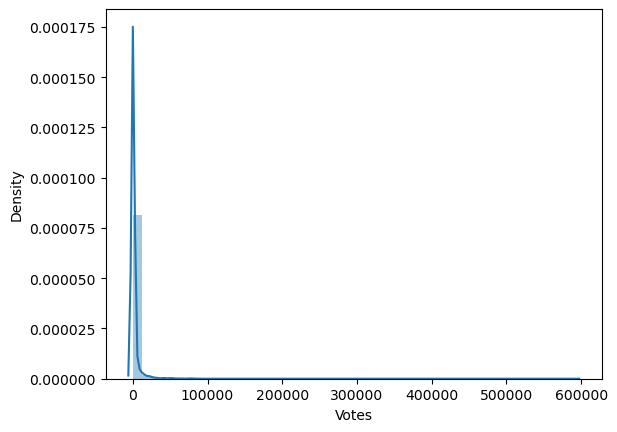

In [37]:
#Votes
sns.distplot(data.Votes)
plt.show()


In [38]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.Votes,interpolation='midpoint')


In [39]:
Q1=data.Votes.quantile(0.25)
Q3=data.Votes.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [40]:
data.loc[data['Votes']>max_limit]

Name  Year  Duration                      Genre  \
15                     102 Not Out  2018       102              Comedy, Drama   
28     13B: Fear Has a New Address  2009       146     Drama, Horror, Mystery   
33                     16 December  2002       158           Action, Thriller   
38                            1920  2008       138   Horror, Mystery, Romance   
39                     1920 London  2016       120            Horror, Mystery   
...                            ...   ...       ...                        ...   
15437                        Ziddi  1997       170              Action, Drama   
15440               Zila Ghaziabad  2013       142    Action, Crime, Thriller   
15447                        Zinda  2006       116     Action, Drama, Mystery   
15476     Zindagi Na Milegi Dobara  2011       155              Comedy, Drama   
15494                     Zubeidaa  2001       153  Biography, Drama, History   

       Rating  Votes                 Director           Actor 1  \
15        7.4   6619             Umesh Shukla  Amitabh Bachchan   
28        7.3   6329          Vikram K. Kumar          Madhavan   
33        6.9   1235             Mani Shankar      Milind Soman   
38        6.4   3100             Vikram Bhatt  Rajniesh Duggall   
39        4.1   1559  Dharmendra Suresh Desai     Sharman Joshi   
...       ...    ...                      ...               ...   
15437     5.8   1551             Guddu Dhanoa        Sunny Deol   
15440     3.6   1301              Kumar Anand    Kushagra Anand   
15447     4.9   3314             Sanjay Gupta       Sanjay Dutt   
15476     8.2  70344              Zoya Akhtar    Hrithik Roshan   
15494     6.2   1496            Shyam Benegal    Karisma Kapoor   

               Actor 2         Actor 3  
15        Rishi Kapoor      Vijay Raaz  
28       Neetu Chandra  Poonam Dhillon  
33     Danny Denzongpa  Gulshan Grover  
38         Adah Sharma    Anjori Alagh  
39        Meera Chopra   Vishal Karwal  
...                ...             ...  
15437   Raveena Tandon     Anupam Kher  
15440     Vivek Oberoi       Usman Rao  
15447     John Abraham      Lara Dutta  
15476    Farhan Akhtar      Abhay Deol  
15494            Rekha  Manoj Bajpayee  

[1311 rows x 10 columns]

In [41]:
len(data.loc[data['Votes']>max_limit])

1311

In [42]:
data.shape

(7558, 10)

In [43]:
1311/7558*100
#outliers more tha 5%

17.345858692775867

In [44]:
genre_df = data.groupby('Genre').agg({'Rating':['mean','count']})
genre_df.reset_index(inplace=True)
genre_df.columns = ['Genre','Average Rating','Movie Count']
genre_df['Average Rating'] = genre_df['Average Rating'].round(1)
genre_df

# it will be used for mapping
genre_dict = dict(zip(genre_df['Genre'],genre_df['Average Rating']))


In [45]:
directors  = data.groupby('Director').agg({'Rating':['mean','count']})
directors.columns = directors.columns.droplevel(0)
directors.reset_index(inplace=True)
directors.columns = ['Director','Average Rating','Movie count']
directors['Average Rating'] = directors['Average Rating'].round(1)
directors.sort_values(by='Movie count',ascending=False,inplace=True)
directors.head()

directors_dict = dict(zip(directors['Director'],directors['Average Rating']))


In [47]:
df_melted = data.melt(id_vars='Rating', value_name='actor', var_name='role', value_vars=['Actor 1', 'Actor 2', 'Actor 3'])
actor_scores = df_melted.groupby('actor')['Rating'].agg(['mean', 'count'])
actor_scores.reset_index(inplace=True)
actor_scores.columns = ['Actor','Average Score', 'Number of movies']
actor_scores.sort_values('Number of movies', ascending=False, inplace=True)
actor_scores['Average Score']=actor_scores['Average Score'].round(1)
actor_scores

actor_score_dict = dict(zip(actor_scores['Actor'], actor_scores['Average Score']))

In [48]:
data = data.drop(['Name'],axis=1)
data['Genre'] = data['Genre'].map(genre_dict)
data['Director'] = data['Director'].map(directors_dict)
data['Actor 1'] = data['Actor 1'].map(actor_score_dict)
data['Actor 2'] = data['Actor 2'].map(actor_score_dict)
data['Actor 3'] = data['Actor 3'].map(actor_score_dict)
data

Year  Duration  Genre  Rating  Votes  Director  Actor 1  Actor 2  \
1      2019       109    6.3     7.0      8       7.0      6.6      7.0   
3      2019       110    5.7     4.4     35       4.4      5.7      4.4   
5      1997       147    6.2     4.7    827       5.4      4.9      5.9   
6      2005       142    6.8     7.4   1086       7.5      5.6      5.4   
8      2012        82    5.5     5.6    326       5.6      5.6      5.8   
...     ...       ...    ...     ...    ...       ...      ...      ...   
15501  1992       157    5.6     5.3    135       5.6      5.8      6.1   
15503  1989       125    5.6     5.8     44       5.9      6.4      6.6   
15504  1988       171    5.0     4.6     11       4.1      6.2      4.1   
15505  1999       129    5.5     4.5    655       5.2      5.5      4.9   
15508  1998       130    5.5     6.2     20       4.4      5.8      5.4   

       Actor 3  
1          7.0  
3          4.4  
5          6.5  
6          6.7  
8          5.6  
...        ...  
15501      4.9  
15503      5.7  
15504      6.2  
15505      5.6  
15508      5.1  

[7558 rows x 9 columns]

### Scaling

In [49]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['Genre','Director','Duration','Actor 1','Actor 2','Actor 3']]=scale.fit_transform(data[['Genre','Director','Duration','Actor 1','Actor 2','Actor 3']])


In [50]:
pd.set_option('display.max_columns', None)
data

Year  Duration     Genre  Rating  Votes  Director   Actor 1   Actor 2  \
1      2019  0.316547  0.557143     7.0      8  0.638554  0.604651  0.642857   
3      2019  0.323741  0.471429     4.4     35  0.325301  0.500000  0.333333   
5      1997  0.589928  0.542857     4.7    827  0.445783  0.406977  0.511905   
6      2005  0.553957  0.628571     7.4   1086  0.698795  0.488372  0.452381   
8      2012  0.122302  0.442857     5.6    326  0.469880  0.488372  0.500000   
...     ...       ...       ...     ...    ...       ...       ...       ...   
15501  1992  0.661871  0.457143     5.3    135  0.469880  0.511628  0.535714   
15503  1989  0.431655  0.457143     5.8     44  0.506024  0.581395  0.595238   
15504  1988  0.762590  0.371429     4.6     11  0.289157  0.558140  0.297619   
15505  1999  0.460432  0.442857     4.5    655  0.421687  0.476744  0.392857   
15508  1998  0.467626  0.442857     6.2     20  0.325301  0.511628  0.452381   

        Actor 3  
1      0.638554  
3      0.325301  
5      0.578313  
6      0.602410  
8      0.469880  
...         ...  
15501  0.385542  
15503  0.481928  
15504  0.542169  
15505  0.469880  
15508  0.409639  

[7558 rows x 9 columns]

In [51]:
## checking the duplicate rows

#data.duplicate()
data.duplicated().sum()

0

In [52]:
## Saving the preprocessed data.
data.to_csv('Preprocessed_data.csv')

In [53]:
## Loading the data
preprcessed_data=pd.read_csv('Preprocessed_data.csv')

## Feature Selection

In [54]:
preprcessed_data

Unnamed: 0  Year  Duration     Genre  Rating  Votes  Director   Actor 1  \
0              1  2019  0.316547  0.557143     7.0      8  0.638554  0.604651   
1              3  2019  0.323741  0.471429     4.4     35  0.325301  0.500000   
2              5  1997  0.589928  0.542857     4.7    827  0.445783  0.406977   
3              6  2005  0.553957  0.628571     7.4   1086  0.698795  0.488372   
4              8  2012  0.122302  0.442857     5.6    326  0.469880  0.488372   
...          ...   ...       ...       ...     ...    ...       ...       ...   
7553       15501  1992  0.661871  0.457143     5.3    135  0.469880  0.511628   
7554       15503  1989  0.431655  0.457143     5.8     44  0.506024  0.581395   
7555       15504  1988  0.762590  0.371429     4.6     11  0.289157  0.558140   
7556       15505  1999  0.460432  0.442857     4.5    655  0.421687  0.476744   
7557       15508  1998  0.467626  0.442857     6.2     20  0.325301  0.511628   

       Actor 2   Actor 3  
0     0.642857  0.638554  
1     0.333333  0.325301  
2     0.511905  0.578313  
3     0.452381  0.602410  
4     0.500000  0.469880  
...        ...       ...  
7553  0.535714  0.385542  
7554  0.595238  0.481928  
7555  0.297619  0.542169  
7556  0.392857  0.469880  
7557  0.452381  0.409639  

[7558 rows x 10 columns]

In [55]:
l1=['Unnamed: 0']
preprcessed_data.drop(l1,axis=1,inplace=True)

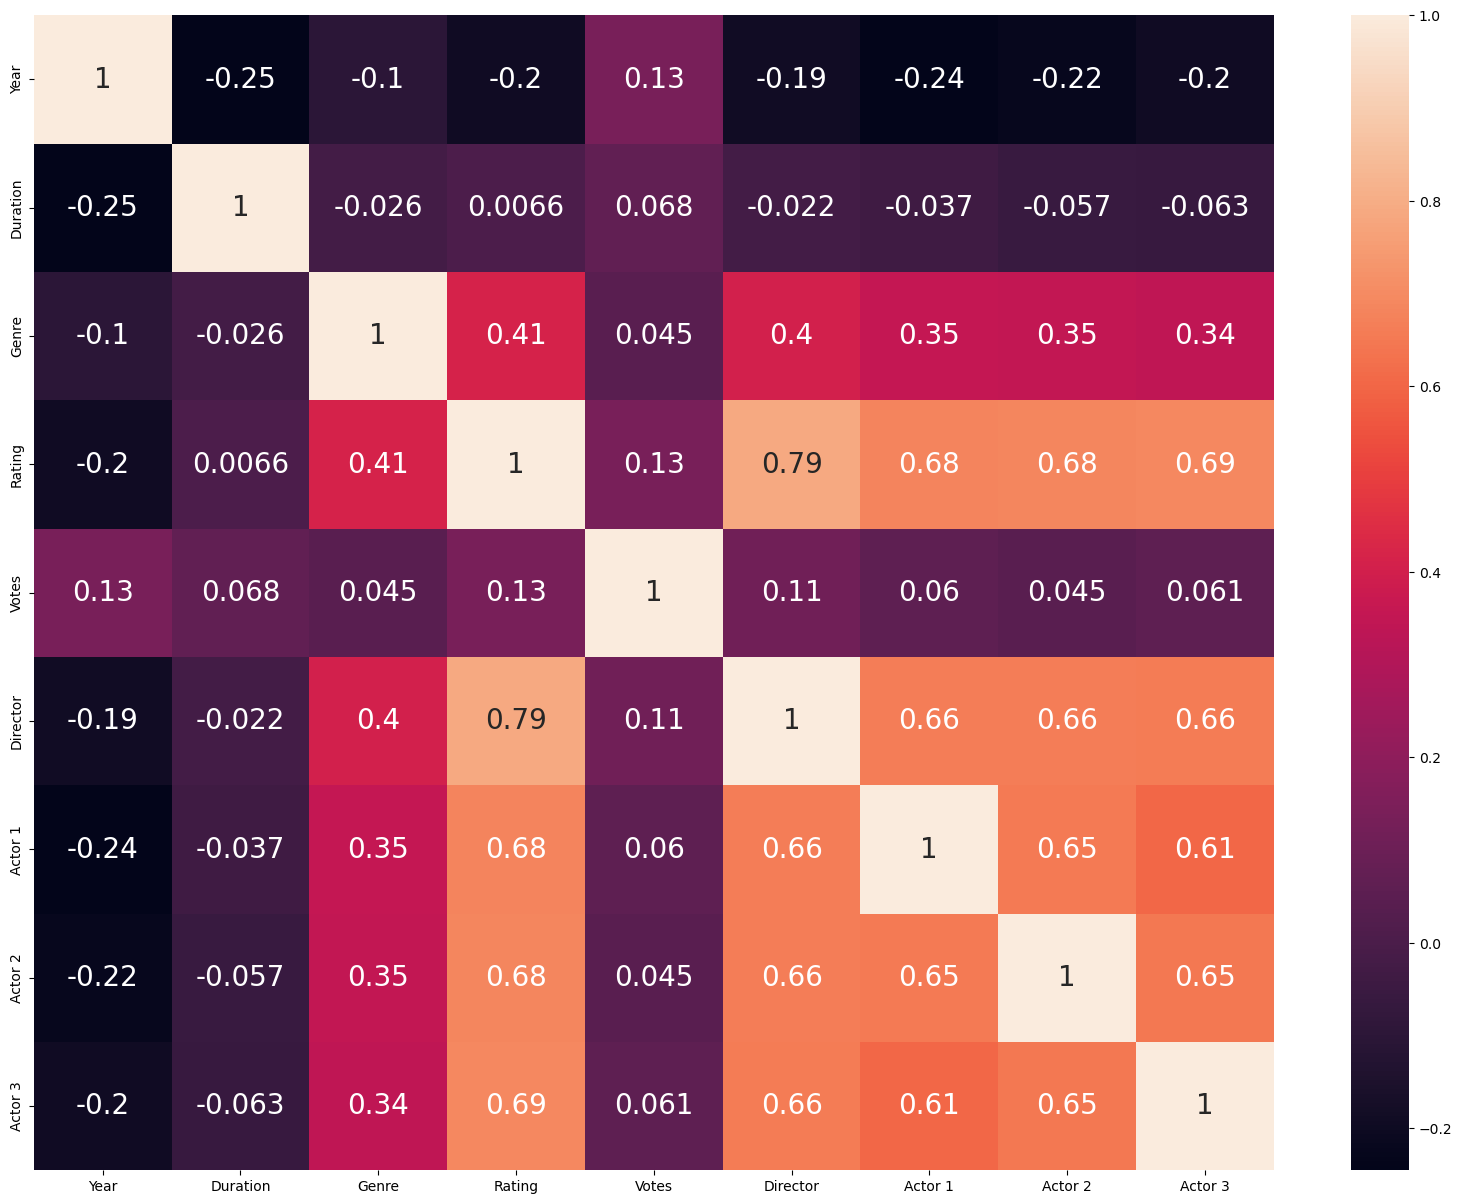

In [58]:
## Checking correlation

plt.figure(figsize=(20, 15))#canvas size
sns.heatmap(preprcessed_data.corr(), annot=True, annot_kws={"size":20})#plotting heat map to check correlation
plt.show()

In [59]:
preprcessed_data.describe()

Year     Duration        Genre       Rating          Votes  \
count  7558.000000  7558.000000  7558.000000  7558.000000    7558.000000   
mean   1993.507542     0.495632     0.485622     5.811127    2029.123842   
std      19.873082     0.174294     0.080545     1.368255   11868.695754   
min    1934.000000     0.000000     0.000000     1.100000       5.000000   
25%    1980.000000     0.374101     0.442857     4.900000      18.000000   
50%    1996.000000     0.503597     0.471429     6.000000      61.000000   
75%    2011.000000     0.618705     0.557143     6.800000     456.000000   
max    2021.000000     1.000000     1.000000    10.000000  591417.000000   

          Director      Actor 1      Actor 2      Actor 3  
count  7558.000000  7558.000000  7558.000000  7558.000000  
mean      0.495178     0.516045     0.499861     0.493421  
std       0.130243     0.107459     0.111199     0.115253  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.412651     0.453488     0.428571     0.421687  
50%       0.506024     0.523256     0.500000     0.493976  
75%       0.590361     0.581395     0.571429     0.566265  
max       1.000000     1.000000     1.000000     1.000000

##### checking co relation with featuers specific to car performance


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7558 non-null   int32  
 1   Duration  7558 non-null   float64
 2   Genre     7558 non-null   float64
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   int32  
 5   Director  7558 non-null   float64
 6   Actor 1   7558 non-null   float64
 7   Actor 2   7558 non-null   float64
 8   Actor 3   7558 non-null   float64
dtypes: float64(7), int32(2)
memory usage: 789.5 KB


In [61]:
preprcessed_data

Year  Duration     Genre  Rating  Votes  Director   Actor 1   Actor 2  \
0     2019  0.316547  0.557143     7.0      8  0.638554  0.604651  0.642857   
1     2019  0.323741  0.471429     4.4     35  0.325301  0.500000  0.333333   
2     1997  0.589928  0.542857     4.7    827  0.445783  0.406977  0.511905   
3     2005  0.553957  0.628571     7.4   1086  0.698795  0.488372  0.452381   
4     2012  0.122302  0.442857     5.6    326  0.469880  0.488372  0.500000   
...    ...       ...       ...     ...    ...       ...       ...       ...   
7553  1992  0.661871  0.457143     5.3    135  0.469880  0.511628  0.535714   
7554  1989  0.431655  0.457143     5.8     44  0.506024  0.581395  0.595238   
7555  1988  0.762590  0.371429     4.6     11  0.289157  0.558140  0.297619   
7556  1999  0.460432  0.442857     4.5    655  0.421687  0.476744  0.392857   
7557  1998  0.467626  0.442857     6.2     20  0.325301  0.511628  0.452381   

       Actor 3  
0     0.638554  
1     0.325301  
2     0.578313  
3     0.602410  
4     0.469880  
...        ...  
7553  0.385542  
7554  0.481928  
7555  0.542169  
7556  0.469880  
7557  0.409639  

[7558 rows x 9 columns]

## Model Creation

In [62]:
## Creating independent and dependent variable
X = preprcessed_data.drop('Rating', axis=1) #independent variable 
y = preprcessed_data.Rating #dependent variable 

In [63]:
X

Year  Duration     Genre  Votes  Director   Actor 1   Actor 2   Actor 3
0     2019  0.316547  0.557143      8  0.638554  0.604651  0.642857  0.638554
1     2019  0.323741  0.471429     35  0.325301  0.500000  0.333333  0.325301
2     1997  0.589928  0.542857    827  0.445783  0.406977  0.511905  0.578313
3     2005  0.553957  0.628571   1086  0.698795  0.488372  0.452381  0.602410
4     2012  0.122302  0.442857    326  0.469880  0.488372  0.500000  0.469880
...    ...       ...       ...    ...       ...       ...       ...       ...
7553  1992  0.661871  0.457143    135  0.469880  0.511628  0.535714  0.385542
7554  1989  0.431655  0.457143     44  0.506024  0.581395  0.595238  0.481928
7555  1988  0.762590  0.371429     11  0.289157  0.558140  0.297619  0.542169
7556  1999  0.460432  0.442857    655  0.421687  0.476744  0.392857  0.469880
7557  1998  0.467626  0.442857     20  0.325301  0.511628  0.452381  0.409639

[7558 rows x 8 columns]

In [64]:
y

0       7.0
1       4.4
2       4.7
3       7.4
4       5.6
       ... 
7553    5.3
7554    5.8
7555    4.6
7556    4.5
7557    6.2
Name: Rating, Length: 7558, dtype: float64

In [82]:
#split -2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

# Linear Regression

##### creating model

In [83]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()#object creation
LR.fit(X_train,y_train) # trainig of model # fit = it fit it into the formula
y_predict=LR.predict(X_test) # LR =model ,LinearRegression is the algorithms

In [84]:
y_test #actual values

6025    5.4
7523    3.9
1456    1.7
3081    5.2
2833    6.8
       ... 
2266    4.0
5652    6.2
828     4.2
802     4.2
2189    8.5
Name: Rating, Length: 1512, dtype: float64

In [85]:
y_predict #values  predicted by model

array([5.5691012 , 3.86158246, 3.96019939, ..., 5.10197399, 4.41857389,
       7.2852433 ])

#  Model Evalution


In [86]:
from sklearn.metrics import r2_score,mean_absolute_error
r2score=r2_score(y_test,y_predict)
#r2 is the matrix

In [87]:
r2score

0.7202517545845455

In [88]:
X_test.shape

(1512, 8)

In [95]:
X_test.size

12096

In [96]:
#calculating the r2 adjusting
adjusted_r2=1-(1-0.72)*(12096-1)/(12096-8-1)
adjusted_r2

0.7198146769256226

In [ ]:
7

# GB_Boosting

In [90]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price


In [91]:
X_test.shape

(1512, 8)

In [92]:
r2score=r2_score(y_test,y_gbm)
r2score

0.7622081287056406

In [98]:
#calculating the r2 adjusting
adjusted_r2=1-(1-0.76)*(12096-1)/(12096-8-1)
adjusted_r2

0.7598411516505337

##### After applying GB Boosting the scores has increased : r2 score -76%

# KNN

In [102]:
## Error calculation for regression task
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(1,20):
    
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.5006391936165033
RMSE value for k=  2 is: 1.296920319377723
RMSE value for k=  3 is: 1.253028958031259
RMSE value for k=  4 is: 1.2255338770226463
RMSE value for k=  5 is: 1.1969752442927697
RMSE value for k=  6 is: 1.1939136879104344
RMSE value for k=  7 is: 1.1784320447137402
RMSE value for k=  8 is: 1.1757296173448433
RMSE value for k=  9 is: 1.1726308874146005
RMSE value for k=  10 is: 1.165919828984415
RMSE value for k=  11 is: 1.163071779182789
RMSE value for k=  12 is: 1.1634198924693595
RMSE value for k=  13 is: 1.1628977651690016
RMSE value for k=  14 is: 1.1598169390199373
RMSE value for k=  15 is: 1.1573715888637472
RMSE value for k=  16 is: 1.1589059478800452
RMSE value for k=  17 is: 1.1584003909428817
RMSE value for k=  18 is: 1.15792141143873
RMSE value for k=  19 is: 1.1566868430760455


In [103]:
from sklearn.metrics import r2_score,mean_absolute_error
r2score=r2_score(y_test,pred)
r2score

0.23328655673066334

In [104]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,pred)))

0.48816415245555966
1.1566868430760455


In [105]:
print(mean_absolute_error(y_test,pred))

0.884245335561125


In [107]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price


In [108]:
r2score=r2_score(y_test,y_gbm)
r2score

0.7622169490153943

In [109]:
y_test.shape

(1512,)

In [110]:
#calculating the r2 adjusting
adjusted_r2=1-(1-0.76)*(12096-1)/(12096-8-1)
adjusted_r2

0.7598411516505337

##### After applying GB Boosting the scores has increased : r2 score -76%

# SVM

In [111]:
## creating training and testing data
from sklearn.model_selection import train_test_split
XS_train,XS_test,yS_train,yS_test=train_test_split(X, y,random_state=50)

In [112]:
# Support Vector Classifier Model

from sklearn.svm import SVR
svRegression = SVR() ## base model with default parameters ###onject creation
svRegression.fit(XS_train, yS_train)#traning of the classifier

SVR()

In [113]:
# Predict output for X_test
y_hat=svRegression.predict(XS_test)

In [114]:
from sklearn.metrics import r2_score,mean_absolute_error
r2score=r2_score(yS_test,y_hat)
r2score

0.02686195825050064

In [115]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(XS_train,yS_train) ## fitting the data
y_gbm=gbm.predict(XS_test)#predicting the price


In [116]:
r2score=r2_score(yS_test,y_gbm)
r2score

0.7520338663369182

##### After applying GB Boosting the scores has increased : r2 score -75%

# Decision Tree

In [118]:
from sklearn.tree import DecisionTreeRegressor
#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()
#object creation for decision tree  
dt.fit(X_train,y_train)
#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([5.5, 3.8, 3.4, ..., 5. , 3.2, 5.5])

In [120]:
r2score=r2_score(y_test,y_hat)
r2score

0.5082545774084442

## RandomForest Implementation

In [124]:
from sklearn.ensemble import RandomForestRegressor#importing randomforest

rf_clf = RandomForestRegressor(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data
yy_predict=rf_clf.predict(X_test)#testing

In [126]:
r2score=r2_score(y_test,yy_predict)
r2score

0.7760080922524516

| Model                  | F1 Score |
|------------------------|----------|
| Linear regression      | 72%      | 
| SVM                    | 02%      |                 
| KNN                    | 76       |                 
| Decision Tree          | 50%      |              
| Random Forest          | 77%      |              
 

    
# So 77 is best score by Random Forest regressor avoiding overfitting

## We can say that random forest is the good model to predict the rating og the movie
